In [2]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode
'''
#2020.07.20 reviewed by Seungsoo Lee @teddy309 
#reference ratsgo blog( https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/30/word2vec/ )

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

dtype = torch.FloatTensor

# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

#test
print(word_sequence)
print(word_list)
print(word_dict)
print(word_dict['i'])
print(len(word_list),len(word_sequence))

['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
['animal', 'book', 'dog', 'milk', 'eyes', 'movie', 'music', 'i', 'apple', 'fish', 'hate', 'like', 'cat']
{'animal': 0, 'book': 1, 'dog': 2, 'milk': 3, 'eyes': 4, 'movie': 5, 'music': 6, 'i': 7, 'apple': 8, 'fish': 9, 'hate': 10, 'like': 11, 'cat': 12}
7
13 42


In [8]:
# Word2Vec Parameter
batch_size = 20  # To show 2 dim embedding graph
embedding_size = 2  # To show 2 dim embedding graph
voc_size = len(word_list)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(data[i][1])  # context word

    return random_inputs, random_labels

# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1): #+1해야되는거 아닌가? -> i번쨰 word_sequence에 있는 단어들에 대해 
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # W and WT is not Transpose relationship(모양은 transpose하지만, 값이 같진 않음.)
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) # voc_size > embedding_size Weight
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size > voc_size Weight

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.WT) # output_layer : [batch_size, voc_size]
        return output_layer


#test
print(skip_grams)
[print(len(skip_grams))]
randInput,randLabels=random_batch(skip_grams,batch_size)
print(randInput)
print(randLabels)
print(Variable(torch.Tensor(randInput)))#oneHot으로 
print(len(randInput),len(randLabels))

[[11, 7], [11, 2], [2, 11], [2, 7], [7, 2], [7, 11], [11, 7], [11, 12], [12, 11], [12, 7], [7, 12], [7, 11], [11, 7], [11, 0], [0, 11], [0, 2], [2, 0], [2, 12], [12, 2], [12, 0], [0, 12], [0, 8], [8, 0], [8, 12], [12, 8], [12, 2], [2, 12], [2, 11], [11, 2], [11, 2], [2, 11], [2, 9], [9, 2], [9, 3], [3, 9], [3, 11], [11, 3], [11, 2], [2, 11], [2, 12], [12, 2], [12, 4], [4, 12], [4, 11], [11, 4], [11, 7], [7, 11], [7, 11], [11, 7], [11, 8], [8, 11], [8, 8], [8, 8], [8, 7], [7, 8], [7, 10], [10, 7], [10, 8], [8, 10], [8, 7], [7, 8], [7, 5], [5, 7], [5, 1], [1, 5], [1, 6], [6, 1], [6, 11], [11, 6], [11, 12], [12, 11], [12, 2], [2, 12], [2, 10], [10, 2], [10, 12], [12, 10], [12, 2], [2, 12], [2, 11]]
80
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 

Epoch: 1000 cost = 1.960879
Epoch: 2000 cost = 1.827704
Epoch: 3000 cost = 2.074756
Epoch: 4000 cost = 1.996650
Epoch: 5000 cost = 1.734741
Epoch: 6000 cost = 1.773432
Epoch: 7000 cost = 1.857014
Epoch: 8000 cost = 1.669368
Epoch: 9000 cost = 1.664464
Epoch: 10000 cost = 1.610184


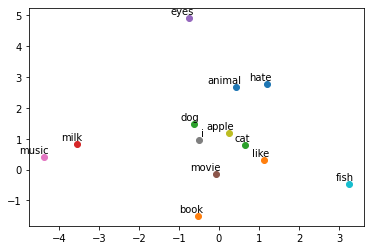

In [5]:
model = Word2Vec()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


numEpoch=5000
# Training
for epoch in range(numEpoch):

    input_batch, target_batch = random_batch(skip_grams, batch_size)

    input_batch = Variable(torch.Tensor(input_batch))
    target_batch = Variable(torch.LongTensor(target_batch))

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()